## P452 Endsem

### Dibya Bharati Pradhan
### 1911067

In [110]:
from scipy import stats
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%run C_Library_Endsem.ipynb

## Q1

In [111]:
file = 'endsemfit.txt'
#reading the txt file with three columns using pandas
data = pd.read_csv(file, header=None, sep='\s+') 
time = data[0]
counts = data[1]
uncertainties = data[2]

print(data)


     0    1   2
0    1  106  10
1   15   80   9
2   30   98  10
3   45   75   9
4   60   74   8
5   75   73   8
6   90   49   7
7  105   38   6
8  120   37   6
9  135   22   5


Source's lifetime is = 96.36253898605243 seconds
Error = 12.844143893726361 seconds
Degrees of freedom = 8
Chi squared value = 17.891415256354144

The fit is not acceptable at 5% level of significance.


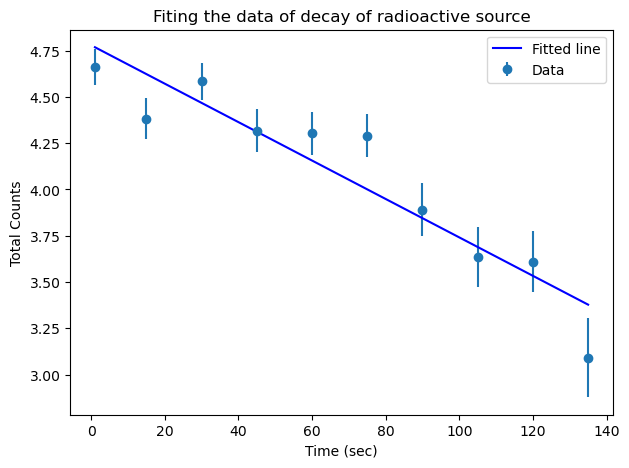

In [112]:

slope = (len(time) * np.sum(time * np.log(counts)) - np.sum(time) * np.sum(np.log(counts))) / (len(time) * np.sum(time**2) - np.sum(time) ** 2)
intercept = (np.sum(np.log(counts)) * np.sum(time**2) - np.sum(time) * np.sum(time * np.log(counts))) / (len(time) * np.sum(time**2) - np.sum(time) ** 2)

residuals = np.log(counts) - (intercept + slope * time)                                     # Calculate residuals
SSR = np.sum(residuals ** 2)                                                                # Calculate sum of squared residuals
std_err_slope = np.sqrt(SSR / (len(time) - 2)) / np.sqrt(np.sum((time - np.mean(time))**2))       # Calculate standard error of the slope
lifetime = -1 / slope


error_lifetime = (std_err_slope / (slope ** 2))
dof = len(time) - 2

critical_chi_squared = 16.919


expected_counts = np.exp(intercept + slope * time)
chi_squared_value = np.sum(((counts - expected_counts) / uncertainties) ** 2)


print("Source's lifetime is =", lifetime, "seconds")
print("Error =", error_lifetime, "seconds")
print("Degrees of freedom =", dof)
print("Chi squared value =", chi_squared_value)
print()


if chi_squared_value < critical_chi_squared:
    print("The fit is acceptable at 5% level of significance.")
else:
    print("The fit is not acceptable at 5% level of significance.")
fitted_counts = np.exp(intercept + slope * time)


plt.figure(figsize=(7, 5))
plt.errorbar(time, np.log(counts), yerr=1/np.sqrt(counts), fmt='o', label='Data')
plt.plot(time, np.log(fitted_counts), label='Fitted line', color='blue')
plt.xlabel('Time (sec)')
plt.ylabel('Total Counts')
# plt.yscale('log')
plt.title('Fiting the data of decay of radioactive source')
plt.legend()
plt.show()


## Q2

In [113]:

def func1(V):
    T = 300
    p = 5.95
    R = 0.0821
    a = 6.254
    b = 0.05422
    return R*T/(p+(a/(V**2))) + b

initial_guess = 1.0
eps=1e-6
root, Num_iter = fixed_point_method(func1, initial_guess, eps)

print ("\nFixed Point Method 1")
print("Initial guess for 1st trial = "+str(initial_guess))


print(f"Root of the equation = {ROUND(root, 4)}")
print(f"Number of iterations = {Num_iter}")


def func2(V):
    T = 300
    p = 5.95
    R = 0.0821
    a = 6.254
    b = 0.05422
    return math.sqrt(a/(R*T/(V-b) - p))

initial_guess = 1.0
eps=1e-6
root, Num_iter = fixed_point_method(func2, initial_guess, eps)

print ("\nFixed Point Method 2")
print("Initial guess for 2nd trial = "+str(initial_guess))


print(f"Root of the equation = {ROUND(root, 4)}")
print(f"Number of iterations = {Num_iter}")


Fixed Point Method 1
Initial guess for 1st trial = 1.0
Root of the equation = 3.9299
Number of iterations = 10

Fixed Point Method 2
Initial guess for 2nd trial = 1.0
Root of the equation = 0.1857
Number of iterations = 36


### So, we get two different solutions with two different fixed point method equations

## Q6

In [114]:
## using RNG and accept/reject method to generate random numbers

# def random_gen(a,m,i,f,x0=1):
#     Ran=random_genQ1(a,m,x0)
#     return(i+(f-i)*Ran)



Success Probability: 0.4853


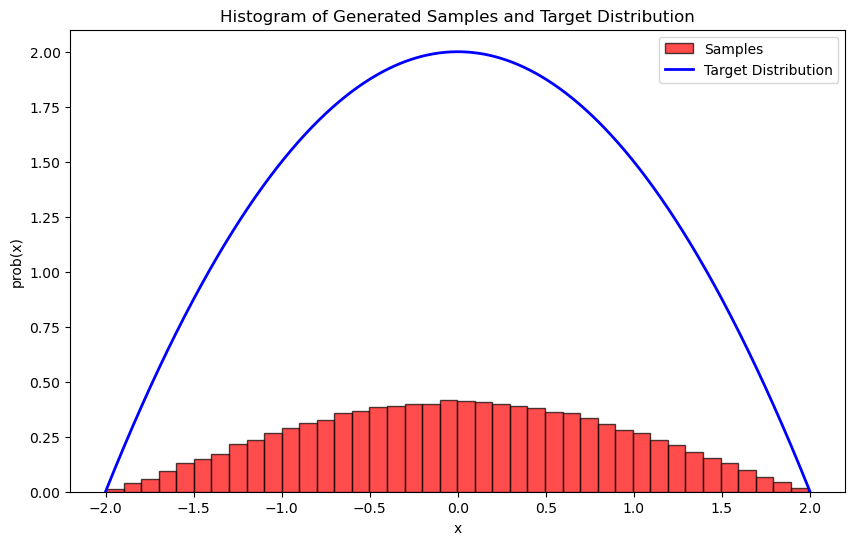

In [115]:


num_samples = 100000
alpha = 2

def prob(x):
    return 0.5 * (alpha**2 - x**2) if abs(x) < alpha else 0

samples = []
rejected = 0
while len(samples) < num_samples:
    x = np.random.normal(0, alpha)  
    u = np.random.uniform(0, 0.5 * alpha**2)
    if u < prob(x):
        samples.append(x)
    else:
        rejected += 1

success_probability = num_samples / (num_samples + rejected)
print(f"Success Probability: {success_probability:.4f}")


plt.figure(figsize=(10, 6))
plt.hist(samples, bins=40, density=True, color='red', edgecolor='black', alpha=0.7, label='Samples')


x_values = np.linspace(-alpha, alpha, 1000)
y_values = [prob(x) for x in x_values]


plt.plot(x_values, y_values, color='blue', linewidth=2, label='Target Distribution')

plt.xlabel('x')
plt.ylabel('prob(x)')
plt.title('Histogram of Generated Samples and Target Distribution')
plt.legend()
plt.show()


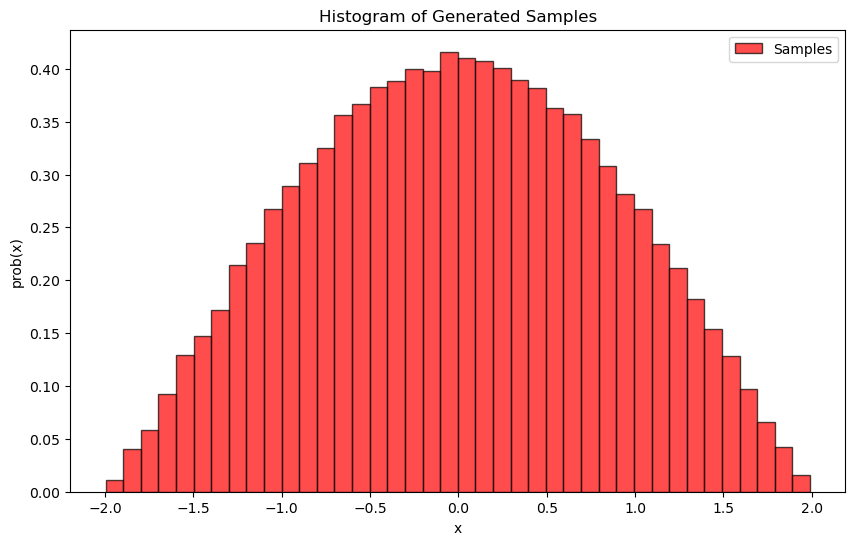

In [116]:
plt.figure(figsize=(10, 6))
plt.hist(samples, bins=40, density=True, color='red', edgecolor='black', alpha=0.7, label='Samples')
plt.xlabel('x')
plt.ylabel('prob(x)')
plt.title('Histogram of Generated Samples')
plt.legend()
plt.show()


## Q5

In [117]:
def power_itrn(Mat, num_sim: int):
    size = Mat.shape[0]
    
    vect = np.random.rand(size)
    
    for _ in range(num_sim):
        vect = np.dot(Mat, vect)
        vect = vect / np.linalg.norm(vect)  # Normalizing the vector
        
    eval = np.dot(vect, np.dot(Mat, vect)) / np.dot(vect, vect)
    evec = vect
    
    return eval, evec

In [118]:
## read matrix from endsemmat.txt

file = 'endsemmat.txt'
data = pd.read_csv(file, header=None, sep='\s+')
matrix = data.values
print(matrix)

[[ 2 -1  0  0  0]
 [-1  2 -1  0  0]
 [ 0 -1  2 -1  0]
 [ 0  0 -1  2 -1]
 [ 0  0  0 -1  2]]


In [119]:
b = 2
a = c = -1
n = 5

# Getting the first two largest eigenvalues and their corresponding eigenvectors
eig_vals = []
eig_vecs = []
mat_n = matrix
for _ in range(2):
    eig_val, eig_vec = power_itrn(mat_n, 1000)
    eig_vals.append(eig_val)
    eig_vecs.append(eig_vec)
    mat_n = mat_n - eig_val * np.outer(eig_vec, eig_vec)

exp_eig_vals = []
for k in range(1, 6):
    val = b + 2 * np.sqrt(a * c) * np.cos(k * np.pi / (n + 1))
    exp_eig_vals.append(val)

exp_eig_vecs = []
for k in range(1, 6):
    vec = []
    for i in range(1, n + 1):
        val = 2 * (np.sqrt(c / a))**k * np.sin(i * k * np.pi / (n + 1))
        vec.append(val)
    exp_eig_vecs.append(vec)



exp_eig_vecs = np.array(exp_eig_vecs)
exp_eig_vecs = exp_eig_vecs / np.linalg.norm(exp_eig_vecs, axis=1)[:, np.newaxis]  # Normalizing the eigenvectors

for n in range(2):
    print(f"Eigenvalue {n+1}: expected: {np.round(exp_eig_vals[n], 4)}, \n \t\t calculated: {np.round(eig_vals[n], 4)}")
    print(f"Eigenvector {n+1}: expected: {np.round(exp_eig_vecs[n], 4)},\n \t\t calculated: {np.round(eig_vecs[n], 4)}")
    print()



Eigenvalue 1: expected: 3.7321, 
 		 calculated: 3.7321
Eigenvector 1: expected: [0.2887 0.5    0.5774 0.5    0.2887],
 		 calculated: [-0.2887  0.5    -0.5774  0.5    -0.2887]

Eigenvalue 2: expected: 3.0, 
 		 calculated: 3.0
Eigenvector 2: expected: [ 0.5  0.5  0.  -0.5 -0.5],
 		 calculated: [-0.5  0.5 -0.  -0.5  0.5]



## Q7

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


The optimal value of alpha is  1.68


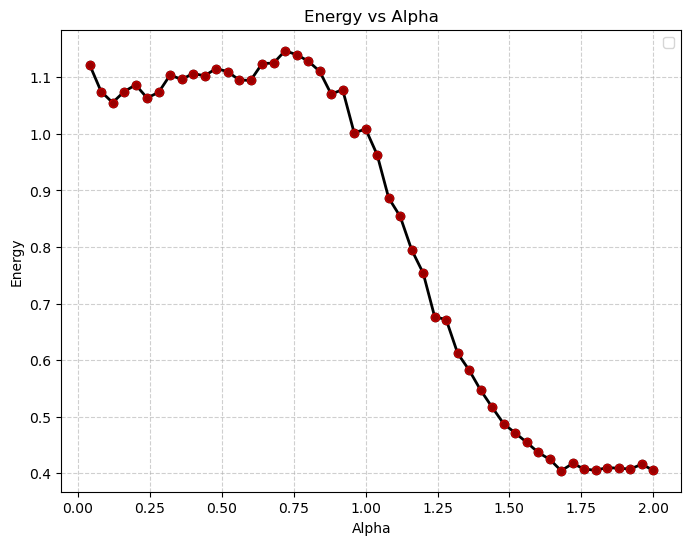

In [120]:
a_vals = np.linspace(0, 2, 51)
energy_vals = []
accept_ratio = []

def total(r_list, a):
    return 0.5 * (1 / (a**2 - r_list**2) + r_list**2)

def potential(r, a):
    if abs(r) < 2:
        return 0.25 * (a**2 - r**2)**2
    else:
        return 0

for a in a_vals:
    r = 0.001
    step = 0.8
    r_lst = [r]
    accepts = 0
    rejects = 0 

    for _ in range(20000):
        old_prob = potential(r, a)
        new_r = r + (np.random.randn()) * step
        new_prob = potential(new_r, a)
        acc_prob = np.random.uniform()

        if acc_prob < min(1, new_prob / old_prob):
            r = new_r
            if _ > 5000:
                r_lst.append(r)
            accepts += 1
        else:
            rejects += 1

    accept_ratio.append(accepts / (accepts + rejects))
    r_lst = np.array(r_lst)
    energies = total(r_lst, a)
    avg_energy = energies.mean()
    energy_vals.append(avg_energy)

print("The optimal value of alpha is ", a_vals[np.where(energy_vals==min(energy_vals[1:]))[0][0]])


plt.figure(figsize=(8, 6))
plt.plot(a_vals[1:], energy_vals[1:], color='black', marker='o', linestyle='-', linewidth=2, markersize=6)
plt.plot(a_vals[1:], energy_vals[1:], 'ro', alpha=0.6)
plt.xlabel("Alpha")
plt.ylabel("Energy")
plt.title("Energy vs Alpha")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

